In [7]:
import json
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
from os import listdir
import re

In [8]:
fig0 = plt.figure(0)

In [9]:
def cmpkey(x, y):
    return int(x)-int(y)

def convert_res_to_points(result_obj, param):
    point_list = []
    for k in sorted(result_obj.keys(), cmp=cmpkey):
        param_val = result_obj[k][param]
        if param_val is None:
            param_val = 0
        point_list.append((int(k), param_val))
    return point_list

def convert_points_to_xy(point_list):
    x = []
    y = []
    for p in point_list:
        x.append(p[0])
        y.append(p[1])
    return x, y
    
def read_result_files(re_rule, param):
    pl_array = []
    filenames = listdir('../data')
    filename_pattern = re.compile(re_rule)
    for filename in filenames:
        if filename_pattern.match(filename):
            print filename
            result_obj = json.load(open('../data/'+filename, 'r'))
            pl = convert_res_to_points(result_obj, param)
            print pl
            pl_array.append(pl)
    return pl_array

def cal_avg_pl(pl_array):
    added_pl_arr = np.array(pl_array[0])
    del pl_array[0]
    pl_arr_np = np.array(pl_array)
    for pl_np in pl_arr_np:
        added_pl_arr += pl_np
    added_pl_arr /= (len(pl_array)+1)
    return added_pl_arr

In [10]:
pl_array20 = read_result_files('results\-sleep20\-\d+\.json', 'meanLatencyMs')
avg_pl20 = cal_avg_pl(pl_array20)
print avg_pl20
x20, y20 = convert_points_to_xy(avg_pl20)

pl_array15 = read_result_files('results\-sleep15\-\d+\.json', 'meanLatencyMs')
avg_pl15 = cal_avg_pl(pl_array15)
print avg_pl15
x15, y15 = convert_points_to_xy(avg_pl15)

plt.ylabel('Mean Latency')
plt.xlim(0, 1200)
plt.ylim(0, 8000)

results-sleep20-1.json
[(100, 4.6), (200, 4), (300, 15.8), (400, 44.2), (500, 717), (600, 1848.5), (700, 4550.9), (800, 5753.4), (900, 0), (1000, 0), (1100, 0)]
[[  1.00000000e+02   4.60000000e+00]
 [  2.00000000e+02   4.00000000e+00]
 [  3.00000000e+02   1.58000000e+01]
 [  4.00000000e+02   4.42000000e+01]
 [  5.00000000e+02   7.17000000e+02]
 [  6.00000000e+02   1.84850000e+03]
 [  7.00000000e+02   4.55090000e+03]
 [  8.00000000e+02   5.75340000e+03]
 [  9.00000000e+02   0.00000000e+00]
 [  1.00000000e+03   0.00000000e+00]
 [  1.10000000e+03   0.00000000e+00]]
results-sleep15-2.json
[(20, 6.6), (40, 8), (60, 7.8), (80, 7.5), (100, 8.8), (120, 13.1), (140, 20.5), (160, 27.3), (180, 99.9), (200, 371.4), (220, 692), (240, 1105.7), (260, 1440.1), (280, 1576.2), (300, 1708.3), (320, 2031.1), (340, 2691.1), (360, 2380.6), (380, 2705.2), (400, 7168.6), (420, 4825.8), (440, 9401.3), (460, 9148.4), (480, 4541.5), (500, 5608.6), (520, 0)]
results-sleep15-8.json
[(20, 6.8), (40, 8.3), (60, 7.7)

(0, 8000)

In [11]:
plt.plot(x20, y20, label="HL20s")
plt.plot(x15, y15, label="Ripple15s")

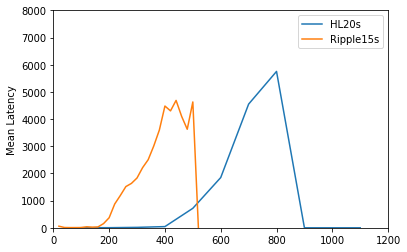

In [12]:
plt.legend()
plt.show()